In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import combinations
import seaborn as sns

In [1018]:
x = np.random.normal(scale=20, size=100)
X = pd.DataFrame(x)
for i in range(1,10):
    X[i] = X[0] ** (i+1)
#X = X.values

eps = 100000 * (np.random.random(size=100)-.5)
b0, b1, b2, b3 = [1,12,6, -4]
if type(X) == type(pd.DataFrame()):
    y = b0 + b1 * X[0] + b2 * X[1] + b3 * X[2] + eps
    type(y)
    y = pd.Series(y)
elif type(X) == type(np.array()):
    pass

(array([ 4.,  7.,  7., 14., 20., 15., 12.,  7.,  7.,  7.]),
 array([-41.0599522 , -32.55803005, -24.0561079 , -15.55418576,
         -7.05226361,   1.44965854,   9.95158069,  18.45350283,
         26.95542498,  35.45734713,  43.95926928]),
 <BarContainer object of 10 artists>)

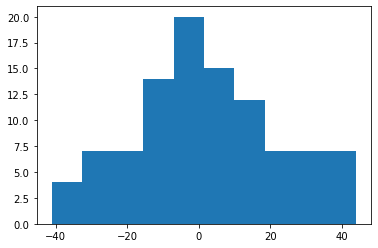

In [1019]:
plt.hist(X[0])

(array([10., 13., 10., 16.,  9.,  6.,  8., 11.,  7., 10.]),
 array([-48226.9454498 , -38405.06300619, -28583.18056258, -18761.29811898,
         -8939.41567537,    882.46676824,  10704.34921185,  20526.23165546,
         30348.11409907,  40169.99654268,  49991.87898629]),
 <BarContainer object of 10 artists>)

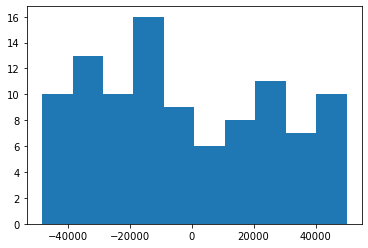

In [1020]:
plt.hist(eps)

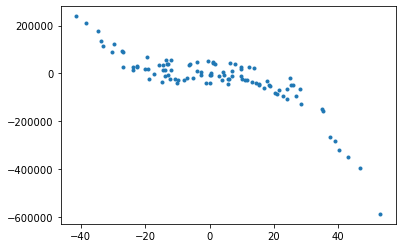

In [1017]:
plt.plot(X[0], y, '.')

In [561]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linreg = LinearRegression()

In [737]:
def train_test_split_CV(X, y, cv=5):
    
    n = X.shape[0]                                                 # Number of obervations in X
    M = n//cv                                                      # Number of obervations in each CV test set
    b = np.arange(0,n,1)                                           # Array of the indices of all observations
    test_split = np.tile(np.empty(M, dtype=int), (cv,1))           # Initialize the test split index array
    train_split = np.tile(np.empty((n-M), dtype=int), (cv,1))      # Initialize the training split index array
    Xtest = np.empty(shape=(cv,M,X.shape[1]), dtype=float)         # Initialize the Xtest array
    Xtrain = np.empty(shape=(cv,(n-M),X.shape[1]), dtype=float)    # Initialize the Xtrain array
    ytest = np.empty(shape=(cv,M), dtype=float)                    # Initialize the ytest array
    ytrain = np.empty(shape=(cv,(n-M)), dtype=float)               # Initialize the ytrain array
    
    for i in range(cv):                                            # Iterate over the CV sets
        n0 = np.array([], dtype=int)                               # Initialize an array of temporary test indices
        L = 0                                                      # Initialize the temporary array length counter

        while L < M:                                               # While the length of the temporary array is less than number of observations in each CV test set
            r = np.random.randint(0,len(b),1)                      # 'r' is one random integer out of the indices of the observations
            n0 = np.append(n0, b[r])                               # The randomly selected index is appended to the temporary test index array
            b = np.delete(b, r)                                    # Remove the selected index from the array of indices of all observations
            L = len(n0)                                            # Set L to the length of the tmeporary test index array
        
        test_split[i] = n0                                         # Set the test split index equal to the temporary array for the current CV step
        a = np.arange(0,n,1)                                       # Set a range of the indices of observations
        train_split[i] = np.delete(a, n0)                          # Set the the training split index array equal to the values not in the test index array
    
        # Assign the values of the test and train sets to the appropriate arrays
        Xtest[i] = X.values[test_split[i],:]
        Xtrain[i] = X.values[train_split[i],:]
        ytest[i] = y.values[test_split[i]]
        ytrain[i] = y.values[train_split[i]]        
    
    return Xtrain, Xtest, ytrain, ytest, train_split, test_split

In [995]:
def best_fit(model, X, y, cv=5, n_iterations=5):
    R2ADJbest = 0
    p = X.shape[1]
    P = list(range(p))
    for i in range(p):
        C = combinations(P,(i+1))
        R2ADJ = np.array([])
        for m in C:
            M = list(m)
            for j in range(n_iterations):
                Xtrain, Xtest, ytrain, ytest, train_split, test_split = train_test_split_CV(X, y, cv)
                for n in range(cv):
                    
                    XtrainDF = pd.DataFrame(Xtrain[n])
                    XtestDF = pd.DataFrame(Xtest[n])
                    modelFit = model.fit(XtrainDF.iloc[:, M], ytrain[n])
                    yPred = modelFit.predict(XtestDF.iloc[:, M])
                    RSS = ((ytest[n] - yPred) ** 2).sum()
                    TSS = ((ytest[n] - yPred.mean()) ** 2).sum()
                    R2ADJit = 1 - (RSS/(ytest.shape[1]-(i+1)-1))/(TSS/(ytest.shape[1]-1))
                    R2ADJ = np.append(R2ADJ, R2ADJit)
            if R2ADJ.mean() > R2ADJbest:
                R2ADJbest = R2ADJ.mean()
                Cbest = m
            print(Cbest, R2ADJbest , m, R2ADJ.mean(), R2ADJ.mean() > R2ADJbest)
    
    return Cbest

In [860]:
'''

def best_fit(model, X, y, cv=5, n_iterations=5):
    R2ADJbest = 0
    p = X.shape[1]
    P = list(range(p))
    for i in range(p):
        C = combinations(P,(i+1))
        R2ADJ = np.array([])
        for m in C:
            M = list(m)
            for j in range(n_iterations):
                Xtrain, Xtest, ytrain, ytest, train_split, test_split = train_test_split_CV(X, y, cv)
                for n in range(cv):
                    XtrainDF = pd.DataFrame(Xtrain[n])
                    XtestDF = pd.DataFrame(Xtest[n])
                    modelFit = model.fit(XtrainDF.iloc[:, M], ytrain[n])
                    yPred = modelFit.predict(XtestDF.iloc[:, M])
                    RSS = ((ytest[n] - yPred) ** 2).sum()
                    TSS = ((ytest[n] - yPred.mean()) ** 2).sum()
                    R2ADJit = 1 - (RSS/(ytest.shape[1]-(i+1)-1))/(TSS/(ytest.shape[1]-1))
                    R2ADJ = np.append(R2, R2ADJit)
                    print(i, m, j, n, RSS, TSS, ytest.shape, (ytest.shape[1]-(i+1)-1), (ytest.shape[1]-1))
            print(R2ADJ.mean(), R2ADJbest , R2ADJ.mean() > R2ADJbest)
            if R2ADJ.mean() > R2ADJbest:
                R2ADJbest = R2ADJ.mean()
                Cbest = m
            print(R2ADJ.mean(), R2ADJbest , R2ADJ.mean() > R2ADJbest, Cbest)
    
    return Cbest

'''

In [941]:
def plot_fit(X, y, Cbest, model):
    Cbest = list(Cbest)
    model.fit(X.iloc[:, Cbest], y)
    Xsorted = X.sort_values(0, axis=0)
    ypred = model.predict(Xsorted.iloc[:, Cbest])
    plt.plot(Xsorted[0], ypred)
    plt.plot(X[0], y, '.')

(0,) 0.4519024137585469 (0,) 0.4519024137585469 False
(0,) 0.4519024137585469 (1,) 0.2567257085793108 False
(2,) 0.4589041556432766 (2,) 0.4589041556432766 False
(2,) 0.4589041556432766 (3,) 0.3374681530171149 False
(2,) 0.4589041556432766 (4,) 0.4313990204245533 False
(2,) 0.4589041556432766 (5,) 0.38625558840632856 False
(2,) 0.4589041556432766 (6,) 0.42922812919442 False
(2,) 0.4589041556432766 (7,) 0.3899752489482132 False
(2,) 0.4589041556432766 (8,) 0.4095463446802789 False
(2,) 0.4589041556432766 (9,) 0.3811683833429089 False
(0, 1) 0.5990034742477585 (0, 1) 0.5990034742477585 False
(0, 2) 0.7388554576393577 (0, 2) 0.7388554576393577 False
(0, 2) 0.7388554576393577 (0, 3) 0.6760777540913776 False
(0, 2) 0.7388554576393577 (0, 4) 0.7163439707122522 False
(0, 2) 0.7388554576393577 (0, 5) 0.6855507558768335 False
(0, 2) 0.7388554576393577 (0, 6) 0.6903697897735569 False
(0, 2) 0.7388554576393577 (0, 7) 0.6835360094614042 False
(0, 2) 0.7388554576393577 (0, 8) 0.6963619788864903 Fal

(0, 1, 2) 0.8564556719449434 (2, 8, 9) 0.6850369795738398 False
(0, 1, 2) 0.8564556719449434 (3, 4, 5) 0.6859648783207242 False
(0, 1, 2) 0.8564556719449434 (3, 4, 6) 0.6880033227913792 False
(0, 1, 2) 0.8564556719449434 (3, 4, 7) 0.6882829481118322 False
(0, 1, 2) 0.8564556719449434 (3, 4, 8) 0.689876736583895 False
(0, 1, 2) 0.8564556719449434 (3, 4, 9) 0.6908066591744844 False
(0, 1, 2) 0.8564556719449434 (3, 5, 6) 0.6886048708821055 False
(0, 1, 2) 0.8564556719449434 (3, 5, 7) 0.6783183605091119 False
(0, 1, 2) 0.8564556719449434 (3, 5, 8) 0.6733070979211458 False
(0, 1, 2) 0.8564556719449434 (3, 5, 9) 0.6646890490213506 False
(0, 1, 2) 0.8564556719449434 (3, 6, 7) 0.6623374464537717 False
(0, 1, 2) 0.8564556719449434 (3, 6, 8) 0.6635287439496451 False
(0, 1, 2) 0.8564556719449434 (3, 6, 9) 0.6626706591339411 False
(0, 1, 2) 0.8564556719449434 (3, 7, 8) 0.6566804576174642 False
(0, 1, 2) 0.8564556719449434 (3, 7, 9) 0.6493955052121756 False
(0, 1, 2) 0.8564556719449434 (3, 8, 9) 0.

(0, 1, 2) 0.8564556719449434 (1, 2, 4, 5) 0.733408694194817 False
(0, 1, 2) 0.8564556719449434 (1, 2, 4, 6) 0.7340508756162115 False
(0, 1, 2) 0.8564556719449434 (1, 2, 4, 7) 0.7352544258353073 False
(0, 1, 2) 0.8564556719449434 (1, 2, 4, 8) 0.7364479003159395 False
(0, 1, 2) 0.8564556719449434 (1, 2, 4, 9) 0.7372820619524082 False
(0, 1, 2) 0.8564556719449434 (1, 2, 5, 6) 0.7381993812857915 False
(0, 1, 2) 0.8564556719449434 (1, 2, 5, 7) 0.7380977107525966 False
(0, 1, 2) 0.8564556719449434 (1, 2, 5, 8) 0.7381097834600991 False
(0, 1, 2) 0.8564556719449434 (1, 2, 5, 9) 0.7389765220394554 False
(0, 1, 2) 0.8564556719449434 (1, 2, 6, 7) 0.7396806095142737 False
(0, 1, 2) 0.8564556719449434 (1, 2, 6, 8) 0.7410718166067096 False
(0, 1, 2) 0.8564556719449434 (1, 2, 6, 9) 0.7421276084769725 False
(0, 1, 2) 0.8564556719449434 (1, 2, 7, 8) 0.7432539431918832 False
(0, 1, 2) 0.8564556719449434 (1, 2, 7, 9) 0.7444892998977534 False
(0, 1, 2) 0.8564556719449434 (1, 2, 8, 9) 0.7454316141213134 Fa

(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 5) 0.8365007359444333 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 6) 0.8363733730648708 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 7) 0.8369410706867324 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 8) 0.8267783429617294 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 9) 0.8287960487950606 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 5, 6) 0.828987752957651 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 5, 7) 0.8290823414278526 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 5, 8) 0.8260214562490644 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 5, 9) 0.8279624838937394 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 6, 7) 0.8260734194384216 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 6, 8) 0.8275618715307242 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 6, 9) 0.8262461985594097 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 7, 8) 0.8247765270986439 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 7, 9) 0.8248121587114295 False
(0, 1, 2) 0.856455671

(0, 1, 2) 0.8564556719449434 (1, 2, 3, 4, 5) 0.7272398429225775 False
(0, 1, 2) 0.8564556719449434 (1, 2, 3, 4, 6) 0.7281296492924401 False
(0, 1, 2) 0.8564556719449434 (1, 2, 3, 4, 7) 0.728096292973077 False
(0, 1, 2) 0.8564556719449434 (1, 2, 3, 4, 8) 0.7285980536015233 False
(0, 1, 2) 0.8564556719449434 (1, 2, 3, 4, 9) 0.7294266354255248 False
(0, 1, 2) 0.8564556719449434 (1, 2, 3, 5, 6) 0.7303906133285898 False
(0, 1, 2) 0.8564556719449434 (1, 2, 3, 5, 7) 0.7308482250957437 False
(0, 1, 2) 0.8564556719449434 (1, 2, 3, 5, 8) 0.7315751560947625 False
(0, 1, 2) 0.8564556719449434 (1, 2, 3, 5, 9) 0.7323285447862876 False
(0, 1, 2) 0.8564556719449434 (1, 2, 3, 6, 7) 0.7330917824982377 False
(0, 1, 2) 0.8564556719449434 (1, 2, 3, 6, 8) 0.7328105468614208 False
(0, 1, 2) 0.8564556719449434 (1, 2, 3, 6, 9) 0.7334599666330034 False
(0, 1, 2) 0.8564556719449434 (1, 2, 3, 7, 8) 0.7335756487188705 False
(0, 1, 2) 0.8564556719449434 (1, 2, 3, 7, 9) 0.7340678679001433 False
(0, 1, 2) 0.856455671

(0, 1, 2) 0.8564556719449434 (4, 5, 6, 8, 9) 0.6929530314411834 False
(0, 1, 2) 0.8564556719449434 (4, 5, 7, 8, 9) 0.6929828475908815 False
(0, 1, 2) 0.8564556719449434 (4, 6, 7, 8, 9) 0.6933971975556071 False
(0, 1, 2) 0.8564556719449434 (5, 6, 7, 8, 9) 0.6918715598055196 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 3, 4, 5) 0.7896147496281547 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 3, 4, 6) 0.7913261219258183 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 3, 4, 7) 0.7907974541750732 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 3, 4, 8) 0.8014709293882708 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 3, 4, 9) 0.8049438041934682 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 3, 5, 6) 0.81100248365815 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 3, 5, 7) 0.8090205599208111 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 3, 5, 8) 0.8053660054248416 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 3, 5, 9) 0.807114435211339 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 3, 6, 7) 0.8096635964644239

(0, 1, 2) 0.8564556719449434 (0, 3, 5, 6, 7, 8) 0.746983612338076 False
(0, 1, 2) 0.8564556719449434 (0, 3, 5, 6, 7, 9) 0.7453724890477295 False
(0, 1, 2) 0.8564556719449434 (0, 3, 5, 6, 8, 9) 0.7403927521816689 False
(0, 1, 2) 0.8564556719449434 (0, 3, 5, 7, 8, 9) 0.7375568025938121 False
(0, 1, 2) 0.8564556719449434 (0, 3, 6, 7, 8, 9) 0.7336685384009786 False
(0, 1, 2) 0.8564556719449434 (0, 4, 5, 6, 7, 8) 0.7338587446500727 False
(0, 1, 2) 0.8564556719449434 (0, 4, 5, 6, 7, 9) 0.7340562416182765 False
(0, 1, 2) 0.8564556719449434 (0, 4, 5, 6, 8, 9) 0.7344779549600238 False
(0, 1, 2) 0.8564556719449434 (0, 4, 5, 7, 8, 9) 0.7345772991292805 False
(0, 1, 2) 0.8564556719449434 (0, 4, 6, 7, 8, 9) 0.7352857459123089 False
(0, 1, 2) 0.8564556719449434 (0, 5, 6, 7, 8, 9) 0.7343398597106386 False
(0, 1, 2) 0.8564556719449434 (1, 2, 3, 4, 5, 6) 0.7342733364622509 False
(0, 1, 2) 0.8564556719449434 (1, 2, 3, 4, 5, 7) 0.7349867309298279 False
(0, 1, 2) 0.8564556719449434 (1, 2, 3, 4, 5, 8) 0.73

(0, 1, 2) 0.8564556719449434 (0, 1, 2, 3, 7, 8, 9) 0.7374784755333725 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 5, 6, 7) 0.7317967644023359 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 5, 6, 8) 0.7325050483050206 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 5, 6, 9) 0.7344540806740864 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 5, 7, 8) 0.7355058962893364 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 5, 7, 9) 0.7345743129384953 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 5, 8, 9) 0.7373082820533323 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 6, 7, 8) 0.7364809278939851 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 6, 7, 9) 0.7357257867218037 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 6, 8, 9) 0.737406900676571 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 7, 8, 9) 0.7402465296803757 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 5, 6, 7, 8) 0.7422268234907821 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 5, 6, 7, 9) 0.7441269704522853 False
(0, 1, 2) 0.8

(0, 1, 2) 0.8564556719449434 (0, 1, 2, 3, 5, 6, 7, 9) 0.5827732596126578 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 3, 5, 6, 8, 9) 0.5849043826219851 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 3, 5, 7, 8, 9) 0.5061327915200741 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 3, 6, 7, 8, 9) 0.5151434777094377 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 5, 6, 7, 8) 0.5307351234232133 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 5, 6, 7, 9) 0.5419161642828356 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 5, 6, 8, 9) 0.5519567977979857 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 5, 7, 8, 9) 0.5621431618439106 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 4, 6, 7, 8, 9) 0.5572936329240131 False
(0, 1, 2) 0.8564556719449434 (0, 1, 2, 5, 6, 7, 8, 9) 0.5615949241856932 False
(0, 1, 2) 0.8564556719449434 (0, 1, 3, 4, 5, 6, 7, 8) 0.5516637740088042 False
(0, 1, 2) 0.8564556719449434 (0, 1, 3, 4, 5, 6, 7, 9) 0.5526191466348613 False
(0, 1, 2) 0.8564556719449434 (0, 1, 3, 4, 5, 6, 8, 9

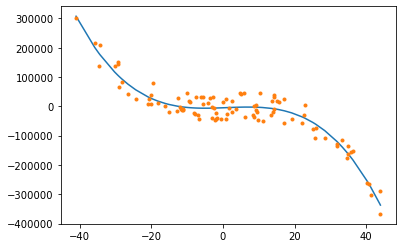

In [1021]:
BEST = best_fit(linreg, X, y, cv=5, n_iterations=1)
plot_fit(X, y, BEST, linreg)

In [1022]:
Xtrain, Xtest, ytrain, ytest, train_split, test_split = train_test_split_CV(X, y, 5)

In [1024]:

linreg.fit(Xtrain[0], ytrain[0])

LinearRegression()

In [1025]:
yPred = linreg.predict(Xtest[0])

In [ ]:
linreg.